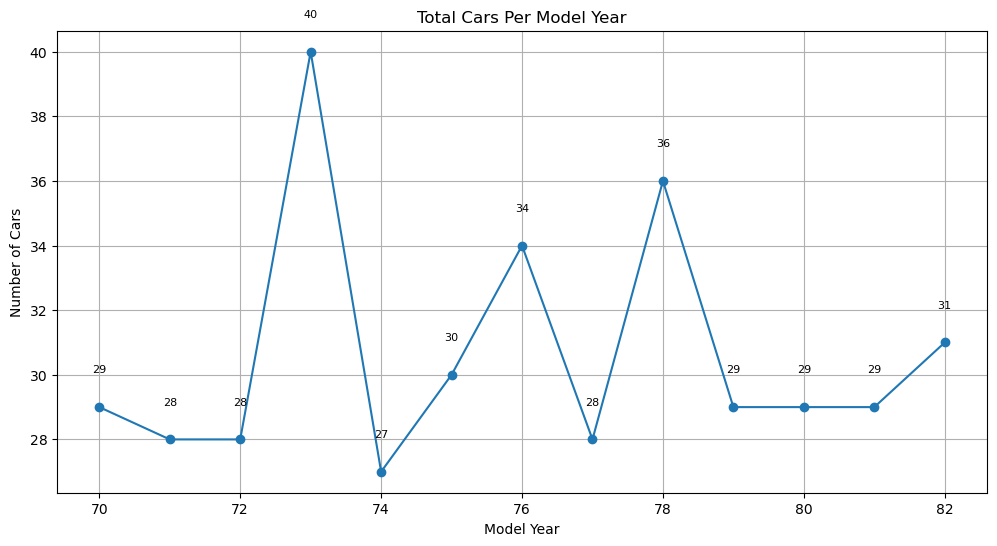

In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Total Cars per Model Year
data = pd.read_csv("Automobile.csv")

# Group by year model and count the number of cars
cars_per_year = data['model_year'].value_counts().sort_index()

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(cars_per_year.index, cars_per_year.values, marker='o')
plt.title('Total Cars Per Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.grid(True)

# Add Label
for x, y in zip(cars_per_year.index, cars_per_year.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=8)
    
plt.show()

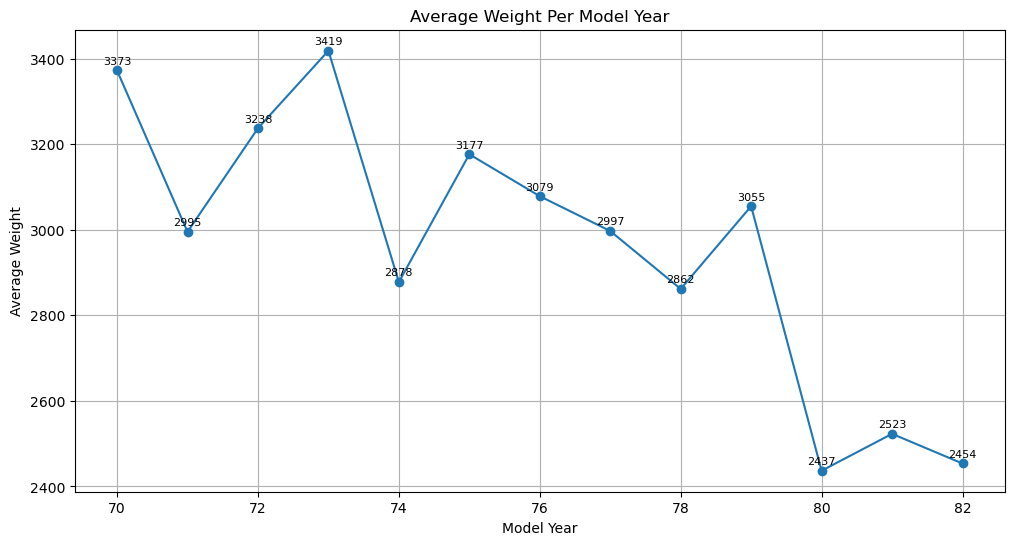

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Average Weight per Model Year
data = pd.read_csv("Automobile.csv")

data['weight'] = pd.to_numeric(data['weight'], errors='coerce')
data = data.dropna(subset=['model_year', 'weight'])

# Group by year model and calculate average weight
avg_weight_per_year = data.groupby('model_year')['weight'].mean().sort_index()

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(avg_weight_per_year.index, avg_weight_per_year.values, marker='o')
plt.title('Average Weight Per Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.grid(True)
# Add Label
for x, y in zip(avg_weight_per_year.index, avg_weight_per_year.values):
    plt.text(x, y + 10, f"{y:.0f}", ha='center', va='bottom', fontsize=8)
plt.show()